<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/DC_PC_Dust/NGC6822_DC_PC_Dust_012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1670, done.
remote: Counting objects: 100% (582/582), done.
remote: Compressing objects: 100% (315/315), done.
remote: Total 1670 (delta 310), reused 475 (delta 266), pack-reused 1088
Receiving objects: 100% (1670/1670), 120.24 MiB | 11.35 MiB/s, done.
Resolving deltas: 100% (833/833), done.
Updating files: 100% (176/176), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [3]:
Z = 0.012
Z_name = ''.join(list(str(Z))[2:])

## Preparing data

In [4]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [5]:
file_address = '/content/NGC_6822/Data/Dust_data.csv'
df = pd.read_csv(file_address)
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']

In [6]:
df

,Dec(J2000) deg,Types,RUN,DCG,imag,e_imag,J,eJ,H,eH,...,err_Flambda_prime_WISE3,Flux_WISE4,Flambda_WISE4,err_Flambda_WISE4,lambda_WISE4,err_lambda_WISE4,err_Flambda_prime_WISE4,f_scale_c,f_scale_o,J-Ks
0,-14.797890,C,C,0.007528,19.719,0.016,17.050,89.99,16.520,89.99,...,89.990000,89.990000,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,6.500000e-16,8.999000e+01,0.900
1,-14.793370,LPV,C/O,0.008392,21.033,0.020,18.550,89.99,17.250,89.99,...,89.990000,89.990000,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,8.400000e-16,2.500000e-15,2.690
2,-14.801910,RSG,C/O,0.003049,16.393,0.006,14.280,89.99,13.660,89.99,...,89.990000,0.002908,3.930500e-16,8.999000e+01,22.194,4.739734,89.990000,8.820000e-15,1.050000e-14,1.010
3,-14.746520,RSG,C/O,0.056664,16.311,0.008,13.900,89.99,13.300,89.99,...,0.200477,0.004421,5.976512e-16,8.999000e+01,22.194,4.739734,89.990000,1.000000e-14,1.600000e-14,0.980
4,-14.802538,C,C,0.010948,19.993,0.038,17.109,89.99,16.477,89.99,...,89.990000,89.990000,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,6.900000e-16,8.999000e+01,1.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-14.888333,C,C/O,0.240919,19.474,0.037,16.732,89.99,89.990,89.99,...,89.990000,0.002359,3.188950e-16,8.999000e+01,22.194,4.739734,89.990000,9.000000e-16,9.700000e-16,1.495
367,-14.762639,C,C,0.216055,19.939,0.037,16.974,89.99,89.990,89.99,...,89.990000,0.003003,4.059268e-16,1.686867e-16,22.194,4.739734,0.150928,9.100000e-16,8.999000e+01,1.752
368,-14.632751,C,C,0.203228,19.008,0.019,16.260,89.99,15.590,89.99,...,89.990000,0.002174,2.937973e-16,8.999000e+01,22.194,4.739734,89.990000,1.400000e-15,8.999000e+01,1.070
369,-14.903560,LAV,C/O,0.124641,89.990,89.990,19.550,0.26,17.750,0.18,...,89.990000,0.002976,4.022053e-16,8.999000e+01,22.194,4.739734,89.990000,9.100000e-16,9.300000e-16,3.660


In [7]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [8]:
X = (df['J-Ks'])
Y = (df['Ks'])

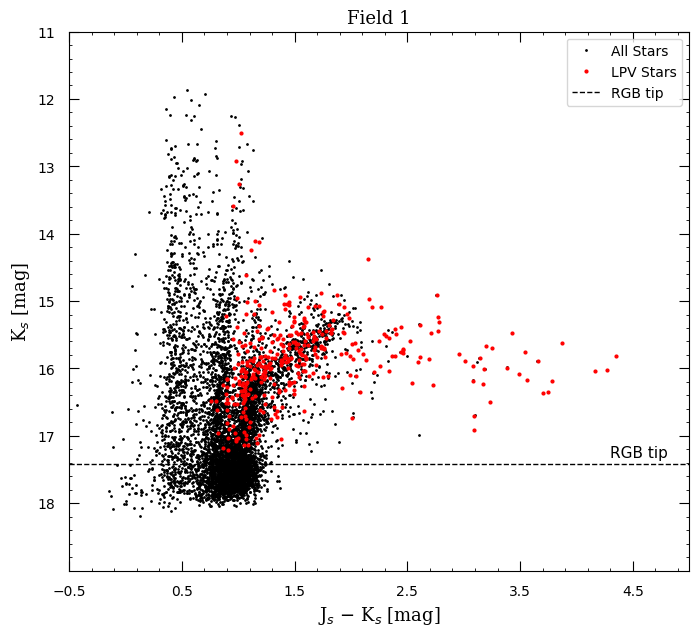

In [9]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5 , -0.5
ymax , ymin = 19  , 11

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'k.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding Isochrones

In [10]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-du5qs6mj
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-du5qs6mj
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 6d94723b263b5b088791d07a5a66e931e24dde07
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.5-py3-none-any.whl size=2586 sha256=0bb619eeb1654650dc0c0c0c53c28a58ccb9fbbecef8f08c501a05b19af9966a
  Stored in directory: /tmp/pip-ephem-wheel-cache-5fgjfhn4/wheels/82/b8/db/4179fef6fc03770dd498d786816b5f961dce1b9a70bd9499cd
Successfully built AstroDC


In [11]:
from AstroDC import AstroDC

In [12]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_01.dat','ISO_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 15:08:30 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [13]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_1.dat','ISO_1')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 15:07:03 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [14]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01 = ISO_df_01[ISO_df_01['Kmag'] < 30]
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.012,-0.093,6.60,0.090000,1.081690,0.090,-1.636,3.4235,3.674,0,...,0.01217,8.860,15.817,15.222,13.942,11.912,9.608,7.034,6.366,5.989
1,0.012,-0.093,6.60,0.093276,1.112348,0.093,-1.625,3.4246,3.684,0,...,0.01217,8.834,15.760,15.137,13.841,11.838,9.550,7.010,6.350,5.973
2,0.012,-0.093,6.60,0.107739,1.232683,0.108,-1.570,3.4307,3.715,0,...,0.01217,8.695,15.470,14.734,13.382,11.493,9.273,6.885,6.253,5.876
3,0.012,-0.093,6.60,0.117505,1.302644,0.117,-1.541,3.4340,3.737,0,...,0.01217,8.622,15.515,14.626,13.202,11.347,9.148,6.818,6.186,5.816
4,0.012,-0.093,6.60,0.125812,1.356457,0.126,-1.508,3.4377,3.748,0,...,0.01217,8.540,15.548,14.509,13.023,11.194,9.014,6.742,6.108,5.748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20346,0.012,-0.093,10.05,0.984614,2.469637,0.740,3.459,3.4753,-0.298,7,...,0.01328,-3.877,4.370,3.986,2.566,0.103,-2.289,-5.595,-6.634,-7.045
20347,0.012,-0.093,10.05,0.984614,2.469637,0.740,3.459,3.4753,-0.298,8,...,0.01198,-3.877,4.369,3.986,2.566,0.103,-2.289,-5.595,-6.634,-7.045
20348,0.012,-0.093,10.05,0.984614,2.469637,0.713,3.464,3.4735,-0.327,8,...,0.01198,-3.890,4.401,4.046,2.617,0.138,-2.261,-5.612,-6.652,-7.067
20349,0.012,-0.093,10.05,0.984616,2.469637,0.683,3.470,3.4727,-0.355,8,...,0.01198,-3.906,4.426,4.081,2.642,0.151,-2.253,-5.629,-6.670,-7.088


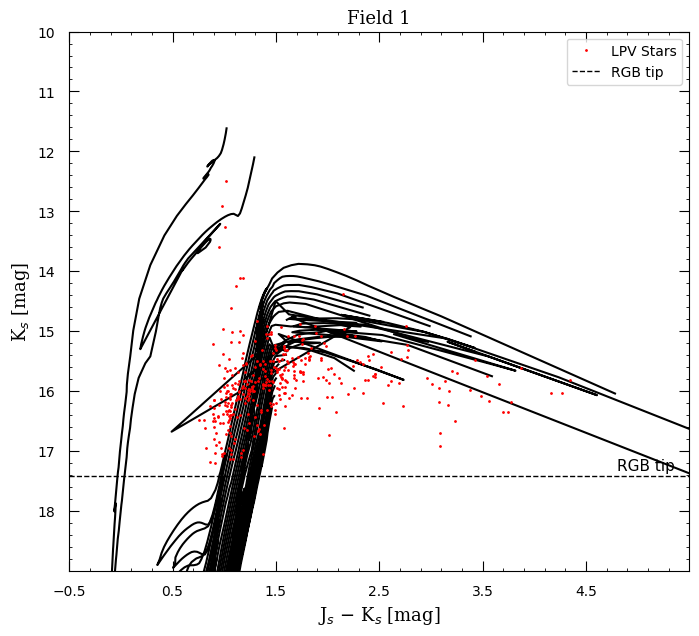

In [15]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [6.8,7,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

In [16]:
ISO_df_1= pd.read_csv("ISO_1.csv")
ISO_df_1['logAge'] = round(ISO_df_1['logAge'], 3)
ISO_df_1 = ISO_df_1[ISO_df_1['Kmag'] < 30]
ISO_df_1

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.012,-0.093,6.60,0.090000,1.081690,0.090,-1.636,3.4235,3.674,0,...,0.01217,8.860,15.817,15.222,13.942,11.912,9.608,7.034,6.366,5.989
1,0.012,-0.093,6.60,0.093276,1.112348,0.093,-1.625,3.4246,3.684,0,...,0.01217,8.834,15.760,15.137,13.841,11.838,9.550,7.010,6.350,5.973
2,0.012,-0.093,6.60,0.107739,1.232683,0.108,-1.570,3.4307,3.715,0,...,0.01217,8.695,15.470,14.734,13.382,11.493,9.273,6.885,6.253,5.876
3,0.012,-0.093,6.60,0.117505,1.302644,0.117,-1.541,3.4340,3.737,0,...,0.01217,8.622,15.515,14.626,13.202,11.347,9.148,6.818,6.186,5.816
4,0.012,-0.093,6.60,0.125812,1.356457,0.126,-1.508,3.4377,3.748,0,...,0.01217,8.540,15.548,14.509,13.023,11.194,9.014,6.742,6.108,5.748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21154,0.012,-0.093,10.05,0.984614,2.469637,0.713,3.464,3.4735,-0.327,8,...,0.01198,-3.890,4.401,4.046,2.617,0.138,-2.261,-5.612,-6.652,-7.067
21155,0.012,-0.093,10.05,0.984615,2.469637,0.706,3.136,3.5225,0.192,8,...,0.01198,-3.071,4.331,2.705,1.003,-0.680,-2.594,-4.635,-5.650,-5.989
21156,0.012,-0.093,10.05,0.984616,2.469637,0.683,3.470,3.4727,-0.355,8,...,0.01198,-3.906,4.426,4.081,2.642,0.151,-2.253,-5.629,-6.670,-7.088
21157,0.012,-0.093,10.05,0.984616,2.469637,0.675,3.145,3.5215,0.161,8,...,0.01198,-3.092,4.352,2.747,1.049,-0.659,-2.592,-4.660,-5.674,-6.017


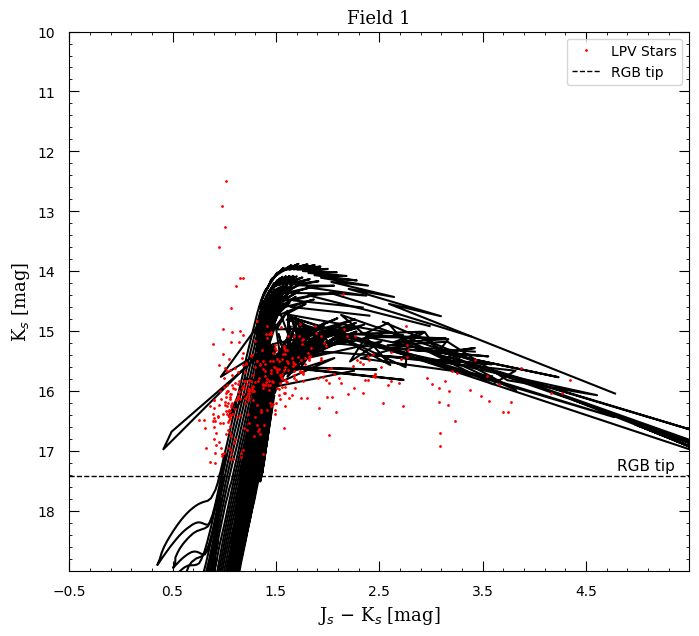

In [17]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Jmag'])  -  (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')


#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Data Correction

Selected years

In [18]:
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]
LOG_AGE_C   = [8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7]
LOG_AGE_O   = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,9.8,9.9,10,10.1]

limitation lines

In [19]:
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_peak_limit = (J_min) - ( K_min)

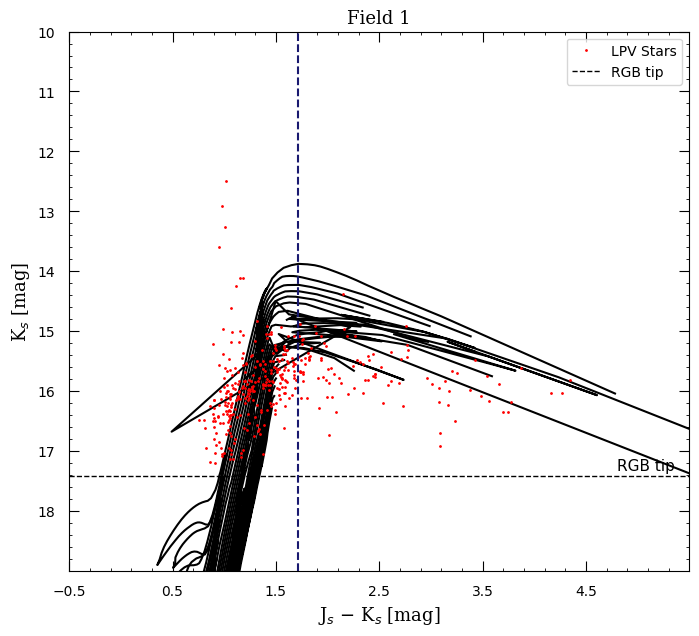

In [20]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

plt.legend(loc='upper right')
plt.savefig('CMD_peak_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

Slope : Carbon

In [21]:
df_Correction_C = ISO_df_01
df_Correction_C['J_K'] = df_Correction_C['Jmag'] - df_Correction_C['Kmag']
df_Correction_C = df_Correction_C[df_Correction_C['logAge'].isin(LOG_AGE_C)]
df_Correction_C = df_Correction_C[df_Correction_C['Kmag'] + DM  < RGBT ]
df_Correction_C = df_Correction_C[df_Correction_C['J_K'] > X_peak_limit].reset_index(drop=True)

In [22]:
Slope_C = []
Slope_C_weight = []
for i in range(0,len(df_Correction_C)-1):
  Slope_C_prime = []
  Slope_C_weight_prime = []
  if df_Correction_C['logAge'][i+1] == df_Correction_C['logAge'][i] :
    K_diff = (df_Correction_C['Kmag'][i+1] - df_Correction_C['Kmag'][i])
    J_K_diff = df_Correction_C['J_K'][i+1] - df_Correction_C['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_C_prime.append( K_diff / J_K_diff )
        Slope_C_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_C_weight_prime) > 0 :
    Slope_C.append(sum((Slope_C_weight_prime / sum(Slope_C_weight_prime)) * Slope_C_prime))
    Slope_C_weight.append(sum(Slope_C_weight_prime))
Slope_C = sum((Slope_C_weight / sum(Slope_C_weight))*Slope_C)

Slope : Oxygen

In [23]:
LOG_AGE_O_prime = LOG_AGE_O[0:3]

df_Correction_O = ISO_df_01
df_Correction_O['J_K'] = df_Correction_O['Jmag'] - df_Correction_O['Kmag']
df_Correction_O = df_Correction_O[df_Correction_O['logAge'].isin(LOG_AGE_O_prime)]
df_Correction_O = df_Correction_O[df_Correction_O['Kmag'] + DM  < RGBT ]
df_Correction_O = df_Correction_O[df_Correction_O['J_K'] > X_peak_limit].reset_index(drop=True)

In [24]:
Slope_O = []
Slope_O_weight = []
for i in range(0,len(df_Correction_O)-1):
  Slope_O_prime = []
  Slope_O_weight_prime = []
  if df_Correction_O['logAge'][i+1] == df_Correction_O['logAge'][i] :
    K_diff = (df_Correction_O['Kmag'][i+1] - df_Correction_O['Kmag'][i])
    J_K_diff = df_Correction_O['J_K'][i+1] - df_Correction_O['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_O_prime.append( K_diff / J_K_diff )
        Slope_O_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_O_weight_prime) > 0 :
    Slope_O.append(sum((Slope_O_weight_prime / sum(Slope_O_weight_prime)) * Slope_O_prime))
    Slope_O_weight.append(sum(Slope_O_weight_prime))
Slope_O = sum((Slope_O_weight / sum(Slope_O_weight))*Slope_O)

In [25]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : 0.376427186756019
Slope_O : 0.658746170744609


Slope : Visualization

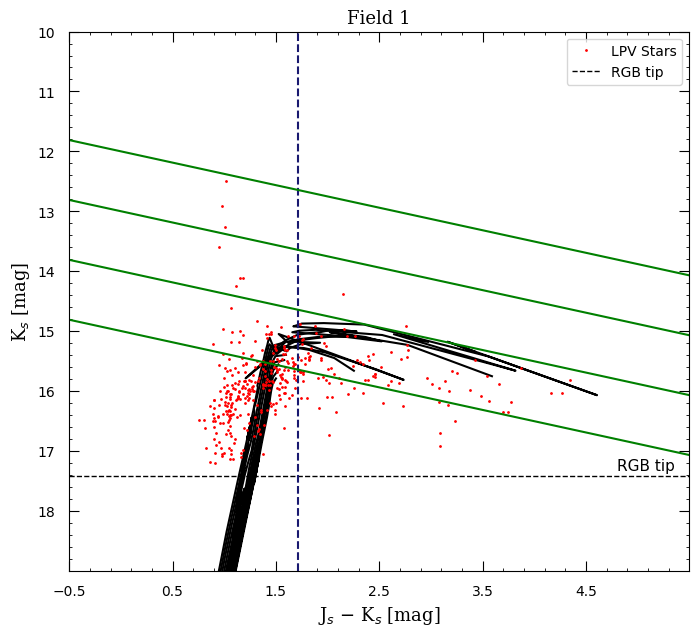

In [26]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

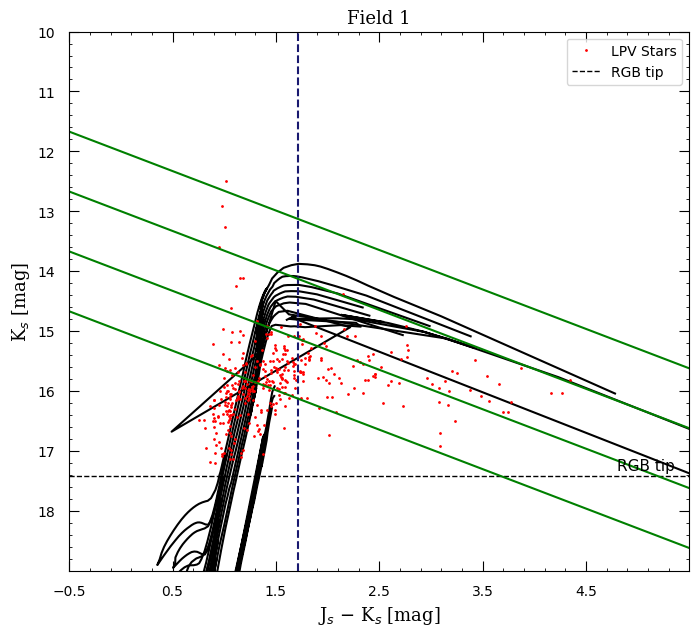

In [27]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_O
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slop lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_O * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

Calculation

In [28]:
df_prime = df[(df['J-Ks']) > X_peak_limit]
df_prime['Ks_Corrected_C'] = (df_prime['Ks']) + (Slope_C * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['Ks_Corrected_O'] = (df_prime['Ks']) + (Slope_O * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['J-Ks_Corrected'] = X_peak_limit

In [29]:
X_Corrected_C =  df_prime['J-Ks_Corrected']
Y_Corrected_C =  df_prime['Ks_Corrected_C']

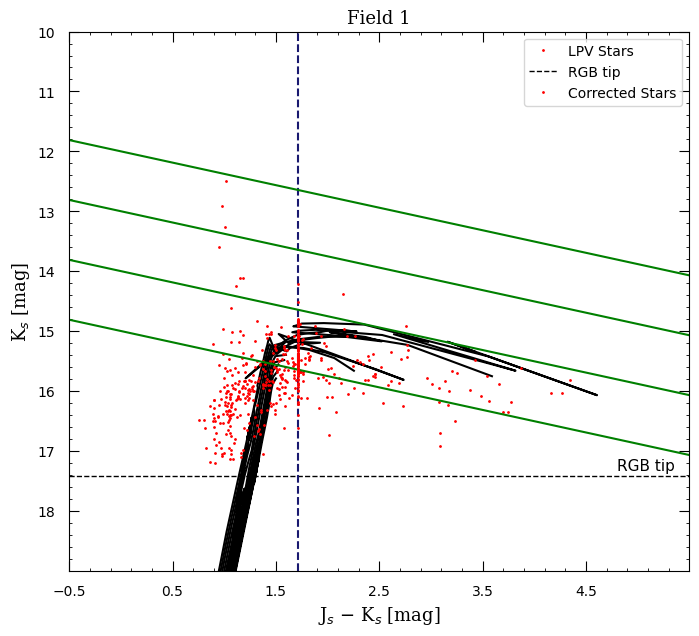

In [30]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

#Corrected Stars with carbon slope
plt.plot(X_Corrected_C, Y_Corrected_C,'r.', markersize = '2', label = 'Corrected Stars')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

In [31]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[ Mag_Mass['Z'] == Z].reset_index(drop=True)

In [32]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
0,0.012,-0.771,-7.674,NaN,-11.715
1,0.012,-0.174,-0.684,-11.715,-11.344
2,0.012,-0.243,-1.464,-11.344,-10.974
3,0.012,-0.248,-1.526,-10.974,-10.603
4,0.012,-0.253,-1.577,-10.603,-10.232
5,0.012,-0.660,-5.741,-10.232,-9.862
6,0.012,-0.191,-1.119,-9.862,-9.492
7,0.012,-0.374,-2.850,-9.492,-9.121
8,0.012,-0.388,-2.978,-9.121,-8.750
9,0.012,-0.204,-1.370,-8.750,-8.380


In [33]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [34]:
a,b = Mag_Mass_a_b_Calculator(Mag_Mass, df_prime['Ks_Corrected_C'].loc[df_prime.index[10]] - DM )

In [35]:
print(f'a: {a}   b: {b}')

a: -0.155   b: -1.12


$Log(M/M_s) = a \times K_s + b$

In [36]:
O_index = []
C_index = []
for i in df_prime.index:
  Ks = df_prime['Ks_Corrected_C'].loc[i] - DM
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, Ks)
  M = 10 ** (a * Ks + b)
  if M > 1.1 and M < 4 :
    C_index.append(i)
  else :
    O_index.append(i)

In [37]:
df_Corrected = df
for i in df_prime.index :
  print(i)
  df_Corrected.loc[i,'J-Ks'] = df_prime.loc[i,'J-Ks_Corrected']
  if i in C_index :
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_C']
    print('C Star --> ' + str(i) )
  else:
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_O']
    print('O Star --> ' + str(i) )

1
C Star --> 1
9
C Star --> 9
10
C Star --> 10
11
C Star --> 11
15
C Star --> 15
17
C Star --> 17
18
O Star --> 18
25
C Star --> 25
32
C Star --> 32
33
C Star --> 33
34
O Star --> 34
36
C Star --> 36
39
C Star --> 39
44
C Star --> 44
47
C Star --> 47
52
C Star --> 52
55
C Star --> 55
56
C Star --> 56
58
C Star --> 58
63
C Star --> 63
64
O Star --> 64
66
C Star --> 66
68
C Star --> 68
71
C Star --> 71
73
C Star --> 73
74
C Star --> 74
75
C Star --> 75
77
C Star --> 77
78
C Star --> 78
81
C Star --> 81
82
C Star --> 82
89
C Star --> 89
91
C Star --> 91
93
C Star --> 93
96
C Star --> 96
97
C Star --> 97
100
C Star --> 100
102
C Star --> 102
107
C Star --> 107
108
C Star --> 108
114
C Star --> 114
116
C Star --> 116
117
C Star --> 117
119
C Star --> 119
120
C Star --> 120
124
C Star --> 124
146
C Star --> 146
147
C Star --> 147
149
C Star --> 149
159
O Star --> 159
164
C Star --> 164
180
C Star --> 180
181
C Star --> 181
184
C Star --> 184
192
C Star --> 192
194
C Star --> 194
196
C Star -

In [38]:
df_Corrected

,Dec(J2000) deg,Types,RUN,DCG,imag,e_imag,J,eJ,H,eH,...,err_Flambda_prime_WISE3,Flux_WISE4,Flambda_WISE4,err_Flambda_WISE4,lambda_WISE4,err_lambda_WISE4,err_Flambda_prime_WISE4,f_scale_c,f_scale_o,J-Ks
0,-14.797890,C,C,0.007528,19.719,0.016,17.050,89.99,16.520,89.99,...,89.990000,89.990000,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,6.500000e-16,8.999000e+01,0.900
1,-14.793370,LPV,C/O,0.008392,21.033,0.020,18.550,89.99,17.250,89.99,...,89.990000,89.990000,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,8.400000e-16,2.500000e-15,1.719
2,-14.801910,RSG,C/O,0.003049,16.393,0.006,14.280,89.99,13.660,89.99,...,89.990000,0.002908,3.930500e-16,8.999000e+01,22.194,4.739734,89.990000,8.820000e-15,1.050000e-14,1.010
3,-14.746520,RSG,C/O,0.056664,16.311,0.008,13.900,89.99,13.300,89.99,...,0.200477,0.004421,5.976512e-16,8.999000e+01,22.194,4.739734,89.990000,1.000000e-14,1.600000e-14,0.980
4,-14.802538,C,C,0.010948,19.993,0.038,17.109,89.99,16.477,89.99,...,89.990000,89.990000,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,6.900000e-16,8.999000e+01,1.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-14.888333,C,C/O,0.240919,19.474,0.037,16.732,89.99,89.990,89.99,...,89.990000,0.002359,3.188950e-16,8.999000e+01,22.194,4.739734,89.990000,9.000000e-16,9.700000e-16,1.495
367,-14.762639,C,C,0.216055,19.939,0.037,16.974,89.99,89.990,89.99,...,89.990000,0.003003,4.059268e-16,1.686867e-16,22.194,4.739734,0.150928,9.100000e-16,8.999000e+01,1.719
368,-14.632751,C,C,0.203228,19.008,0.019,16.260,89.99,15.590,89.99,...,89.990000,0.002174,2.937973e-16,8.999000e+01,22.194,4.739734,89.990000,1.400000e-15,8.999000e+01,1.070
369,-14.903560,LAV,C/O,0.124641,89.990,89.990,19.550,0.26,17.750,0.18,...,89.990000,0.002976,4.022053e-16,8.999000e+01,22.194,4.739734,89.990000,9.100000e-16,9.300000e-16,1.719


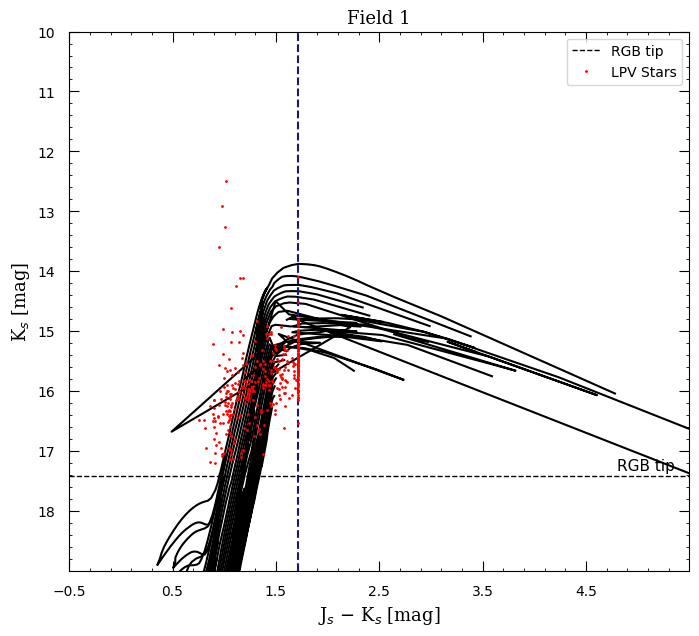

In [39]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#All stars
plt.plot(df_Corrected['J-Ks'], df_Corrected['Ks'],'r.', markersize = '2', label = 'LPV Stars')

plt.legend(loc='upper right')
plt.savefig('Data-Correction-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

# Parameters Calculation

In [40]:
df_final = df_Corrected
df_final

,Dec(J2000) deg,Types,RUN,DCG,imag,e_imag,J,eJ,H,eH,...,err_Flambda_prime_WISE3,Flux_WISE4,Flambda_WISE4,err_Flambda_WISE4,lambda_WISE4,err_lambda_WISE4,err_Flambda_prime_WISE4,f_scale_c,f_scale_o,J-Ks
0,-14.797890,C,C,0.007528,19.719,0.016,17.050,89.99,16.520,89.99,...,89.990000,89.990000,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,6.500000e-16,8.999000e+01,0.900
1,-14.793370,LPV,C/O,0.008392,21.033,0.020,18.550,89.99,17.250,89.99,...,89.990000,89.990000,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,8.400000e-16,2.500000e-15,1.719
2,-14.801910,RSG,C/O,0.003049,16.393,0.006,14.280,89.99,13.660,89.99,...,89.990000,0.002908,3.930500e-16,8.999000e+01,22.194,4.739734,89.990000,8.820000e-15,1.050000e-14,1.010
3,-14.746520,RSG,C/O,0.056664,16.311,0.008,13.900,89.99,13.300,89.99,...,0.200477,0.004421,5.976512e-16,8.999000e+01,22.194,4.739734,89.990000,1.000000e-14,1.600000e-14,0.980
4,-14.802538,C,C,0.010948,19.993,0.038,17.109,89.99,16.477,89.99,...,89.990000,89.990000,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,6.900000e-16,8.999000e+01,1.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-14.888333,C,C/O,0.240919,19.474,0.037,16.732,89.99,89.990,89.99,...,89.990000,0.002359,3.188950e-16,8.999000e+01,22.194,4.739734,89.990000,9.000000e-16,9.700000e-16,1.495
367,-14.762639,C,C,0.216055,19.939,0.037,16.974,89.99,89.990,89.99,...,89.990000,0.003003,4.059268e-16,1.686867e-16,22.194,4.739734,0.150928,9.100000e-16,8.999000e+01,1.719
368,-14.632751,C,C,0.203228,19.008,0.019,16.260,89.99,15.590,89.99,...,89.990000,0.002174,2.937973e-16,8.999000e+01,22.194,4.739734,89.990000,1.400000e-15,8.999000e+01,1.070
369,-14.903560,LAV,C/O,0.124641,89.990,89.990,19.550,0.26,17.750,0.18,...,89.990000,0.002976,4.022053e-16,8.999000e+01,22.194,4.739734,89.990000,9.100000e-16,9.300000e-16,1.719


## Mag_Mass relation

$Log(M/M_s) = a \times K_s + b $

In [41]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[Mag_Mass['Z'] == Z]

In [42]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
196,0.012,-0.771,-7.674,NaN,-11.715
197,0.012,-0.174,-0.684,-11.715,-11.344
198,0.012,-0.243,-1.464,-11.344,-10.974
199,0.012,-0.248,-1.526,-10.974,-10.603
200,0.012,-0.253,-1.577,-10.603,-10.232
201,0.012,-0.660,-5.741,-10.232,-9.862
202,0.012,-0.191,-1.119,-9.862,-9.492
203,0.012,-0.374,-2.850,-9.492,-9.121
204,0.012,-0.388,-2.978,-9.121,-8.750
205,0.012,-0.204,-1.370,-8.750,-8.380


In [43]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [44]:
a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[df_final.index[10],'Ks'] - DM )
print(f'a: {a}   b: {b}')

a: -0.294   b: -2.159


In [45]:
df_final['Log(M/Ms)'] = np.nan
df_final['M/Ms'] = np.nan
for i in df_final.index :
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[i,'Ks'] - DM )
  df_final.loc[i,'Log(M/Ms)'] = a * (df_final.loc[i,'Ks'] - DM) +  b
  df_final.loc[i,'M/Ms'] = pow( 10 , a * (df_final.loc[i,'Ks'] - DM) +  b )

In [46]:
df_final

,Dec(J2000) deg,Types,RUN,DCG,imag,e_imag,J,eJ,H,eH,...,Flambda_WISE4,err_Flambda_WISE4,lambda_WISE4,err_lambda_WISE4,err_Flambda_prime_WISE4,f_scale_c,f_scale_o,J-Ks,Log(M/Ms),M/Ms
0,-14.797890,C,C,0.007528,19.719,0.016,17.050,89.99,16.520,89.99,...,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,6.500000e-16,8.999000e+01,0.900,0.023100,1.054630
1,-14.793370,LPV,C/O,0.008392,21.033,0.020,18.550,89.99,17.250,89.99,...,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,8.400000e-16,2.500000e-15,1.719,0.179920,1.513283
2,-14.801910,RSG,C/O,0.003049,16.393,0.006,14.280,89.99,13.660,89.99,...,3.930500e-16,8.999000e+01,22.194,4.739734,89.990000,8.820000e-15,1.050000e-14,1.010,0.977800,9.501671
3,-14.746520,RSG,C/O,0.056664,16.311,0.008,13.900,89.99,13.300,89.99,...,5.976512e-16,8.999000e+01,22.194,4.739734,89.990000,1.000000e-14,1.600000e-14,0.980,1.087090,12.220529
4,-14.802538,C,C,0.010948,19.993,0.038,17.109,89.99,16.477,89.99,...,8.999000e+01,8.999000e+01,22.194,4.739734,89.990000,6.900000e-16,8.999000e+01,1.185,0.065362,1.162417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-14.888333,C,C/O,0.240919,19.474,0.037,16.732,89.99,89.990,89.99,...,3.188950e-16,8.999000e+01,22.194,4.739734,89.990000,9.000000e-16,9.700000e-16,1.495,0.276644,1.890793
367,-14.762639,C,C,0.216055,19.939,0.037,16.974,89.99,89.990,89.99,...,4.059268e-16,1.686867e-16,22.194,4.739734,0.150928,9.100000e-16,8.999000e+01,1.719,0.287284,1.937688
368,-14.632751,C,C,0.203228,19.008,0.019,16.260,89.99,15.590,89.99,...,2.937973e-16,8.999000e+01,22.194,4.739734,89.990000,1.400000e-15,8.999000e+01,1.070,0.294880,1.971878
369,-14.903560,LAV,C/O,0.124641,89.990,89.990,19.550,0.26,17.750,0.18,...,4.022053e-16,8.999000e+01,22.194,4.739734,89.990000,9.100000e-16,9.300000e-16,1.719,0.306770,2.026611


(array([ 66., 139.,  99.,  51.,   8.,   4.,   1.,   0.,   1.,   2.]),
 array([-0.1528 , -0.01856,  0.11568,  0.24992,  0.38416,  0.5184 ,
         0.65264,  0.78688,  0.92112,  1.05536,  1.1896 ]),
 <BarContainer object of 10 artists>)

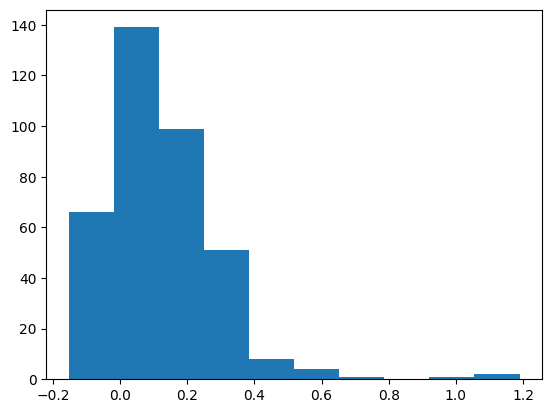

In [47]:
plt.hist(df_final['Log(M/Ms)'])

(array([333.,  30.,   4.,   1.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0.70339617,  2.18044732,  3.65749846,  5.13454961,  6.61160075,
         8.0886519 ,  9.56570305, 11.04275419, 12.51980534, 13.99685648,
        15.47390763]),
 <BarContainer object of 10 artists>)

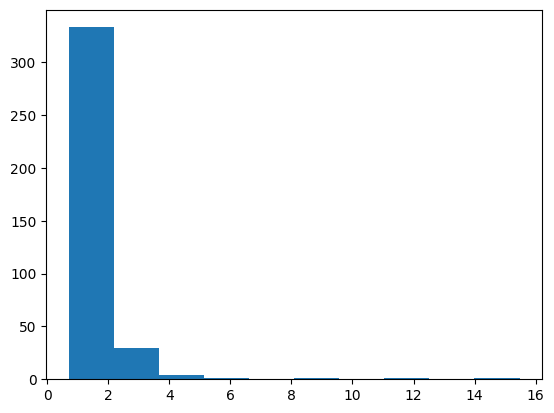

In [48]:
plt.hist(df_final['M/Ms'])

## Mass_Age relation

$ Log(t) = a \times Log(M/M_s) + b $

In [49]:
Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data.csv', encoding= 'unicode_escape')
Mass_Age = Mass_Age[Mass_Age['Z'] == Z]

In [50]:
Mass_Age

,Z,a,b,M validity range (lower limit),M validity range (upper limit)
16,0.012,-3.266,10.019,NaN,0.186
17,0.012,-2.499,9.876,0.186,0.408
18,0.012,-2.898,10.039,0.408,0.630
19,0.012,-2.280,9.650,0.630,0.852
20,0.012,-1.771,9.216,0.852,1.074
21,0.012,-1.387,8.803,1.074,1.296
22,0.012,-1.080,8.405,1.296,1.519
23,0.012,-0.779,7.949,1.519,NaN


In [51]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [52]:
a , b = Mass_Age_a_b_Calculator(Mass_Age, df_final.loc[df_final.index[10],'Log(M/Ms)'])
print(f'a: {a}   b: {b}')

a: -3.266   b: 10.019


In [53]:
round(df_final.loc[288,'Log(M/Ms)'],3)

-0.041

In [54]:
df_final['Log(t)'] = np.nan
df_final['t'] = np.nan
for i in df_final.index :
  a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_final.loc[i,'Log(M/Ms)'],3))
  df_final.loc[i,'Log(t)'] = a * (df_final.loc[i,'Log(M/Ms)']) +  b
  df_final.loc[i,'t'] = pow( 10 , df_final.loc[i,'Log(t)'] )

In [55]:
df_final

,Dec(J2000) deg,Types,RUN,DCG,imag,e_imag,J,eJ,H,eH,...,lambda_WISE4,err_lambda_WISE4,err_Flambda_prime_WISE4,f_scale_c,f_scale_o,J-Ks,Log(M/Ms),M/Ms,Log(t),t
0,-14.797890,C,C,0.007528,19.719,0.016,17.050,89.99,16.520,89.99,...,22.194,4.739734,89.990000,6.500000e-16,8.999000e+01,0.900,0.023100,1.054630,9.943555,8.781231e+09
1,-14.793370,LPV,C/O,0.008392,21.033,0.020,18.550,89.99,17.250,89.99,...,22.194,4.739734,89.990000,8.400000e-16,2.500000e-15,1.719,0.179920,1.513283,9.431381,2.700105e+09
2,-14.801910,RSG,C/O,0.003049,16.393,0.006,14.280,89.99,13.660,89.99,...,22.194,4.739734,89.990000,8.820000e-15,1.050000e-14,1.010,0.977800,9.501671,7.484316,3.050115e+07
3,-14.746520,RSG,C/O,0.056664,16.311,0.008,13.900,89.99,13.300,89.99,...,22.194,4.739734,89.990000,1.000000e-14,1.600000e-14,0.980,1.087090,12.220529,7.295206,1.973359e+07
4,-14.802538,C,C,0.010948,19.993,0.038,17.109,89.99,16.477,89.99,...,22.194,4.739734,89.990000,6.900000e-16,8.999000e+01,1.185,0.065362,1.162417,9.805528,6.390395e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-14.888333,C,C/O,0.240919,19.474,0.037,16.732,89.99,89.990,89.99,...,22.194,4.739734,89.990000,9.000000e-16,9.700000e-16,1.495,0.276644,1.890793,9.184667,1.529913e+09
367,-14.762639,C,C,0.216055,19.939,0.037,16.974,89.99,89.990,89.99,...,22.194,4.739734,0.150928,9.100000e-16,8.999000e+01,1.719,0.287284,1.937688,9.158078,1.439057e+09
368,-14.632751,C,C,0.203228,19.008,0.019,16.260,89.99,15.590,89.99,...,22.194,4.739734,89.990000,1.400000e-15,8.999000e+01,1.070,0.294880,1.971878,9.139095,1.377510e+09
369,-14.903560,LAV,C/O,0.124641,89.990,89.990,19.550,0.26,17.750,0.18,...,22.194,4.739734,89.990000,9.100000e-16,9.300000e-16,1.719,0.306770,2.026611,9.109381,1.286415e+09


(array([  3.,   0.,   1.,   4.,   2.,  47.,  74., 105.,  96.,  39.]),
 array([ 7.1530248,  7.4895268,  7.8260288,  8.1625308,  8.4990328,
         8.8355348,  9.1720368,  9.5085388,  9.8450408, 10.1815428,
        10.5180448]),
 <BarContainer object of 10 artists>)

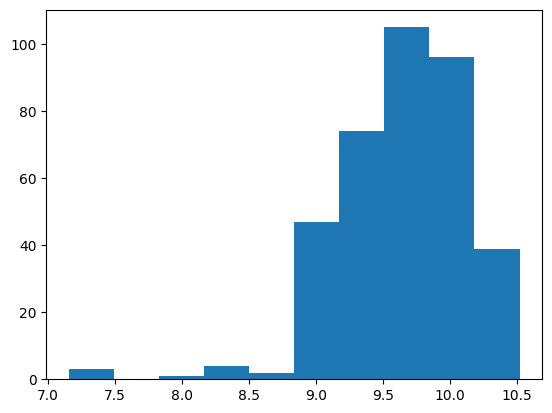

In [56]:
plt.hist(df_final['Log(t)'])

(array([133.,  92.,  56.,  36.,  19.,  13.,   5.,   5.,   8.,   4.]),
 array([1.42241001e+07, 3.30923884e+09, 6.60425358e+09, 9.89926832e+09,
        1.31942831e+10, 1.64892978e+10, 1.97843125e+10, 2.30793273e+10,
        2.63743420e+10, 2.96693568e+10, 3.29643715e+10]),
 <BarContainer object of 10 artists>)

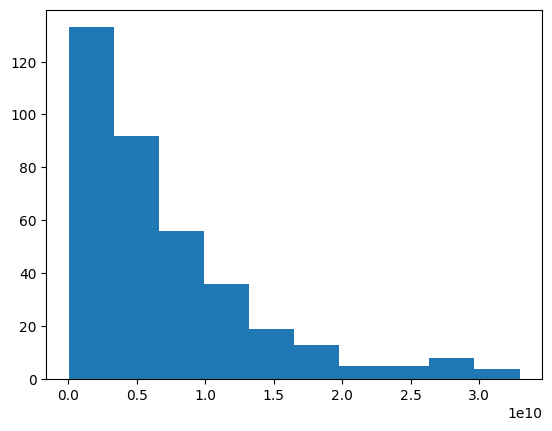

In [57]:
plt.hist(df_final['t'])

## Mass_Pulsation relation

In [58]:
Mass_Pulsation = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Pulsation_relation_data.csv', encoding= 'unicode_escape')
Mass_Pulsation = Mass_Pulsation[Mass_Pulsation['Z'] == Z]

In [59]:
Mass_Pulsation

,Z,I,a,b,c,D
56,0.012,1,4.495,1.346,0.436,-6.06
57,0.012,2,3.393,0.372,0.420,0.00
58,0.012,3,1.027,1.077,0.122,0.00
59,0.012,4,0.655,0.708,0.106,0.00


In [60]:
def Mass_Pulsation_a_b_c_D_Calculator(Relation_DataFrame, i ):
  a = Relation_DataFrame.iloc[i-1]['a']
  b = Relation_DataFrame.iloc[i-1]['b']
  c = Relation_DataFrame.iloc[i-1]['c']
  D = Relation_DataFrame.iloc[0]['D']
  return a , b , c , D

In [61]:
a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation,2)
print(f'a: {a}   b: {b}  c: {c}  D: {D}')

a: 3.393   b: 0.372  c: 0.42  D: -6.06


$ Log(δt) = Log(t) + D + Σ_1^4 a_i exp[-(Log(M/M_s) - b_i)^2 / c_i^2]$

In [62]:
df_final['Log(dt)'] = np.nan
df_final['dt'] = np.nan
for i in df_final.index :
  log_dt = []
  log_t = df_final.loc[i,'Log(t)']
  log_M_Ms = df_final.loc[i,'Log(M/Ms)']
  for j in range(1,5):
    a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation, j )
    s = a * np.exp(-((log_M_Ms-b)**2)/(c**2))
    log_dt.append(s)

  df_final.loc[i,'Log(dt)'] = log_t + D + np.sum(log_dt)
  df_final.loc[i,'dt'] = pow( 10 , df_final.loc[i,'Log(dt)'] )

In [63]:
df_final

,Dec(J2000) deg,Types,RUN,DCG,imag,e_imag,J,eJ,H,eH,...,err_Flambda_prime_WISE4,f_scale_c,f_scale_o,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
0,-14.797890,C,C,0.007528,19.719,0.016,17.050,89.99,16.520,89.99,...,89.990000,6.500000e-16,8.999000e+01,0.900,0.023100,1.054630,9.943555,8.781231e+09,5.585708,3.852189e+05
1,-14.793370,LPV,C/O,0.008392,21.033,0.020,18.550,89.99,17.250,89.99,...,89.990000,8.400000e-16,2.500000e-15,1.719,0.179920,1.513283,9.431381,2.700105e+09,6.127540,1.341344e+06
2,-14.801910,RSG,C/O,0.003049,16.393,0.006,14.280,89.99,13.660,89.99,...,89.990000,8.820000e-15,1.050000e-14,1.010,0.977800,9.501671,7.484316,3.050115e+07,4.582148,3.820749e+04
3,-14.746520,RSG,C/O,0.056664,16.311,0.008,13.900,89.99,13.300,89.99,...,89.990000,1.000000e-14,1.600000e-14,0.980,1.087090,12.220529,7.295206,1.973359e+07,5.601359,3.993546e+05
4,-14.802538,C,C,0.010948,19.993,0.038,17.109,89.99,16.477,89.99,...,89.990000,6.900000e-16,8.999000e+01,1.185,0.065362,1.162417,9.805528,6.390395e+09,5.737423,5.462899e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-14.888333,C,C/O,0.240919,19.474,0.037,16.732,89.99,89.990,89.99,...,89.990000,9.000000e-16,9.700000e-16,1.495,0.276644,1.890793,9.184667,1.529913e+09,6.358172,2.281245e+06
367,-14.762639,C,C,0.216055,19.939,0.037,16.974,89.99,89.990,89.99,...,0.150928,9.100000e-16,8.999000e+01,1.719,0.287284,1.937688,9.158078,1.439057e+09,6.368162,2.334331e+06
368,-14.632751,C,C,0.203228,19.008,0.019,16.260,89.99,15.590,89.99,...,89.990000,1.400000e-15,8.999000e+01,1.070,0.294880,1.971878,9.139095,1.377510e+09,6.373049,2.360746e+06
369,-14.903560,LAV,C/O,0.124641,89.990,89.990,19.550,0.26,17.750,0.18,...,89.990000,9.100000e-16,9.300000e-16,1.719,0.306770,2.026611,9.109381,1.286415e+09,6.376842,2.381454e+06


(array([ 2.,  0.,  0., 23., 47., 49., 74., 43., 50., 83.]),
 array([4.51923286, 4.70500808, 4.89078331, 5.07655854, 5.26233376,
        5.44810899, 5.63388421, 5.81965944, 6.00543466, 6.19120989,
        6.37698512]),
 <BarContainer object of 10 artists>)

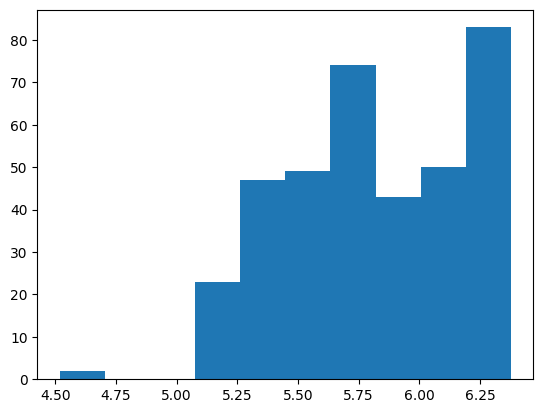

In [64]:
plt.hist(df_final['Log(dt)'])

(array([67., 78., 59., 28., 28., 23., 11., 19., 19., 39.]),
 array([  33054.67243007,  267972.98783368,  502891.30323729,
         737809.61864091,  972727.93404452, 1207646.24944813,
        1442564.56485174, 1677482.88025535, 1912401.19565896,
        2147319.51106258, 2382237.82646619]),
 <BarContainer object of 10 artists>)

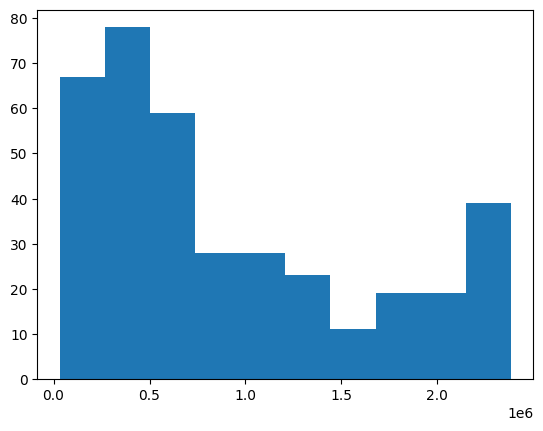

In [65]:
plt.hist(df_final['dt'])

## Data Saving

In [66]:
df_final.to_csv('NGC6822_LPV_Data_'+ Z_name +'.csv', index=False)